## **Arabic Speech to Text Translation**

In [ ]:
!pip3 install transformers
!pip3 install datasets
!pip3 install huggingsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.2 MB/s eta 0:00:0

In [ ]:
import torch
import librosa
import IPython.display as ipd
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from datasets import load_dataset

In [ ]:
processor = Wav2Vec2Processor.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-arabic")
model = Wav2Vec2ForCTC.from_pretrained("jonatasgrosman/wav2vec2-large-xlsr-53-arabic")

test_dataset = load_dataset("common_voice", "ar", split=f"test[:10]")

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


/root/.cache/huggingface/modules/datasets_modules/datasets/common_voice/220833898d6a60c50f621126e51fb22eb2dfe5244392c70dccd8e6e2f055f4bf/common_voice.py:634: FutureWarning: 
            This version of the Common Voice dataset is deprecated.
            You can download the latest one with
            >>> load_dataset("mozilla-foundation/common_voice_11_0", "en")
            
  warnings.warn(


Generating train split:   0%|          | 0/14227 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7622 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7517 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/18283 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/43291 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/6333 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ar/6.1.0/220833898d6a60c50f621126e51fb22eb2dfe5244392c70dccd8e6e2f055f4bf. Subsequent calls will reuse this data.


In [ ]:
def speech_file_to_array(batch):
    speech_array, sampling_rate = librosa.load(batch["path"], sr=16_000)
    batch["speech"] = speech_array
    batch["sentence"] = batch["sentence"].upper()
    return batch

test_dataset = test_dataset.map(speech_file_to_array)
inputs = processor(test_dataset["speech"], sampling_rate=16_000, return_tensors="pt", padding=True)

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

In [ ]:
with torch.no_grad():
    logits = model(inputs.input_values, attention_mask=inputs.attention_mask).logits

predicted_ids = torch.argmax(logits, dim=-1)
predicted_sentences = processor.batch_decode(predicted_ids)

for i, predicted_sentence in enumerate(predicted_sentences):
    print("-" * 100)
    print("Reference:", test_dataset[i]["sentence"])
    print("Prediction:", predicted_sentence)


----------------------------------------------------------------------------------------------------
Reference: ما أطول عودك!
Prediction: ما أطول عودك
----------------------------------------------------------------------------------------------------
Reference: ماتت عمتي منذ سنتين.
Prediction: ماتت عمتي منذ سنتين
----------------------------------------------------------------------------------------------------
Reference: الألمانية ليست لغة سهلة.
Prediction: الألمانية ليست لغة سهلة
----------------------------------------------------------------------------------------------------
Reference: طلبت منه أن يبعث الكتاب إلينا.
Prediction: طلبت منه أن يبعث الكتاب إلينا
----------------------------------------------------------------------------------------------------
Reference: .السيد إيتو رجل متعلم
Prediction: السيد إيتو رجل متعلم
----------------------------------------------------------------------------------------------------
Reference: الحمد لله.
Prediction: الحمد لله
--------------

In [ ]:
audio_data_informal = '/content/sample_data/SalmaNewegy_informal-audio_2023-04-16.mp4'
audio_data_formal = '/content/sample_data/SalmaNewegy_formal-audio_2023-04-16.mp4'

In [ ]:
ipd.Audio(audio_data_informal)

In [ ]:
ipd.Audio(audio_data_formal)

In [ ]:
from huggingsound import SpeechRecognitionModel

model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-arabic")
audio_paths = [ audio_data_informal, audio_data_formal]

transcriptions = model.transcribe(audio_paths)

print([t["transcription"] for t in transcriptions])

INFO:huggingsound.speech_recognition.model:Loading model...
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
100%|██████████| 2/2 [00:14<00:00,  7.29s/it]

['الخرف الوفكر  بذاخطر على نفسه اللحوليه', 'الخروفة الذي يفكر يصير ختراً على نفسه على الآخرين']


In [ ]:
print(transcriptions[1]["transcription"])

الخروفة الذي يفكر يصير ختراً على نفسه على الآخرين


In [ ]:
ar_text = transcriptions[1]["transcription"]

## **Arabic to English Translation**

In [ ]:
# Install PySpark and Spark NLP
! pip install -q pyspark==3.3.0 spark-nlp==4.2.8

# Install Spark NLP Display lib
! pip install --upgrade -q spark-nlp-display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.0 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import numpy as np

import sparknlp
import pyspark.sql.functions as F

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.types import StringType, IntegerType

In [ ]:
spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.2.8
Apache Spark version: 3.3.0


In [ ]:
documentAssembler = DocumentAssembler()\
  .setInputCol("ar_text")\
  .setOutputCol("document")

## More accurate Sentence Detection using Deep Learning
sentencerDL = SentenceDetectorDLModel()\
  .pretrained("sentence_detector_dl", "xx")\
  .setInputCols(["document"])\
  .setOutputCol("sentences")

marian = MarianTransformer.pretrained("opus_mt_ar_en", "xx")\
  .setInputCols(["sentences"])\
  .setOutputCol("translation")

nlp_pipeline = Pipeline(
    stages=[
        documentAssembler, 
        sentencerDL, 
        marian
        ])

sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
opus_mt_ar_en download started this may take some time.
Approximate size to download 390.7 MB
[OK!]


In [ ]:
empty_df = spark.createDataFrame([[""]]).toDF('ar_text')
pipeline_model = nlp_pipeline.fit(empty_df)
lmodel = LightPipeline(pipeline_model)
res = lmodel.fullAnnotate(ar_text)


Before _validateStagesInputCols


In [ ]:
print ('Original:', ar_text, '\n\n')

print ('Translated:\n')
for sentence in res[0]['translation']:
  print (sentence.result)

Original: الخروفة الذي يفكر يصير ختراً على نفسه على الآخرين 


Translated:

A sheep that thinks it's a traitor on itself over others.


## **Text Generator using RNN and LSTM**

In [ ]:
import requests
content = requests.get("http://www.gutenberg.org/cache/epub/11/pg11.txt").text
open("sample_data/wonderland.txt", "w", encoding="utf-8").write(content)

167775

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.11
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
FILE_PATH = "sample_data/wonderland.txt"
BASENAME = os.path.basename(FILE_PATH)
# read the data
text = open(FILE_PATH, encoding="utf-8").read()

In [ ]:
print('Length of text: {} characters'.format(len(text)))

Length of text: 164016 characters


In [ ]:
# Take a look at the first 250 characters in text.
print(text[:250])

﻿The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may cop


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))

print('{} unique characters'.format(len(vocab)))
print('vocab:', vocab)

90 unique characters
vocab: ['\n', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ù', '—', '‘', '’', '“', '”', '\ufeff']


In [ ]:
# Map characters to their indices in vocabulary.
char2index = {char: index for index, char in enumerate(vocab)}

print('{')
for char, _ in zip(char2index, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2index[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  '$' :   5,
  '%' :   6,
  "'" :   7,
  '(' :   8,
  ')' :   9,
  '*' :  10,
  ',' :  11,
  '-' :  12,
  '.' :  13,
  '/' :  14,
  '0' :  15,
  '1' :  16,
  '2' :  17,
  '3' :  18,
  '4' :  19,
  ...
}


In [ ]:
# Map character indices to characters from vacabulary.
index2char = np.array(vocab)
print(index2char)

['\n' ' ' '!' '"' '#' '$' '%' "'" '(' ')' '*' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '?' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 '[' ']' '_' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z' 'ù' '—' '‘' '’' '“' '”'
 '\ufeff']


In [ ]:
# Convert chars in text to indices.
text_as_int = np.array([char2index[char] for char in text])

print('text_as_int length: {}'.format(len(text_as_int)))
print('{} --> {}'.format(repr(text[:15]), repr(text_as_int[:15])))

text_as_int length: 164016
'\ufeffThe Project Gu' --> array([89, 47, 64, 61,  1, 43, 74, 71, 66, 61, 59, 76,  1, 34, 77])


### **Creating traning sequence**

In [ ]:
# The maximum length sentence we want for a single input in characters.
sequence_length = 100
examples_per_epoch = len(text) // (sequence_length + 1)

print('examples_per_epoch:', examples_per_epoch)

examples_per_epoch: 1623


In [ ]:
# Create training dataset.
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for char in char_dataset.take(5):
    print(index2char[char.numpy()])

﻿
T
h
e
 


In [ ]:
# Generate batched sequences out of the char_dataset.
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

# Sequences size is the same as examples_per_epoch.
print('Sequences count: {}'.format(len(list(sequences.as_numpy_iterator()))));
print()

# Sequences examples.
for item in sequences.take(5):
    print(repr(''.join(index2char[item.numpy()])))

Sequences count: 1623

'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for'
' the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and wit'
'h almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof th'
'e Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not l'
'ocated in the United States, you\nwill have to check the laws of the country where you are located bef'


In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

In [ ]:
dataset = sequences.map(split_input_target)

# Dataset size is the same as examples_per_epoch.
# But each element of a sequence is now has length of `sequence_length`
# and not `sequence_length + 1`.
print('dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

dataset size: 1623


In [ ]:
for input_example, target_example in dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    print('Input:', repr(''.join(index2char[input_example.numpy()])))
    print('Target:', repr(''.join(index2char[target_example.numpy()])))

Input sequence size: 100
Target sequence size: 100

Input: '\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is fo'
Target: 'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for'


In [ ]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(index2char[target_idx])))

Step  0
  input: 89 ('\ufeff')
  expected output: 47 ('T')
Step  1
  input: 47 ('T')
  expected output: 64 ('h')
Step  2
  input: 64 ('h')
  expected output: 61 ('e')
Step  3
  input: 61 ('e')
  expected output: 1 (' ')
Step  4
  input: 1 (' ')
  expected output: 43 ('P')


### **Split training sequences into batches**

In [ ]:
# Batch size.
BATCH_SIZE = 64

# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [ ]:
print('Batched dataset size: {}'.format(len(list(dataset.as_numpy_iterator()))))

Batched dataset size: 25


In [ ]:
for input_text, target_text in dataset.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[71 76  1 ... 69 65 70]
 [ 0 75 64 ...  1 59 57]
 [61 57 76 ... 79  0 76]
 ...
 [ 1 79 61 ... 58 61  0]
 [ 1 64 71 ... 71 74 69]
 [76 71 63 ... 60 13 88]], shape=(64, 100), dtype=int64)

1st batch: target_text: tf.Tensor(
[[76  1 76 ... 65 70 60]
 [75 64 61 ... 59 57 74]
 [57 76  0 ...  0 76 64]
 ...
 [79 61 74 ... 61  0 71]
 [64 71 72 ... 74 69 71]
 [71 63 61 ... 13 88  1]], shape=(64, 100), dtype=int64)


### **Build the model**

In [ ]:
# Let's do a quick detour and see how Embeding layer works.
# It takes several char indices sequences (batch) as an input.
# It encodes every character of every sequence to a vector of tmp_embeding_size length.
tmp_vocab_size = 10
tmp_embeding_size = 5
tmp_input_length = 8
tmp_batch_size = 2

tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embeding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)

print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

1/1 [==============================] - 0s 113ms/step
tmp_input_array shape: (2, 8)
tmp_input_array:
[[8 5 8 4 6 5 4 8]
 [7 3 4 8 3 4 2 7]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[-0.04691098  0.02559519 -0.01409416 -0.02325447 -0.02996677]
  [-0.04295332 -0.0159706  -0.03369731 -0.04476552  0.02920168]
  [-0.04691098  0.02559519 -0.01409416 -0.02325447 -0.02996677]
  [ 0.01352251  0.02070799  0.02679333  0.03175184 -0.0498093 ]
  [ 0.02504716 -0.02349681  0.01317804 -0.02089192 -0.00108499]
  [-0.04295332 -0.0159706  -0.03369731 -0.04476552  0.02920168]
  [ 0.01352251  0.02070799  0.02679333  0.03175184 -0.0498093 ]
  [-0.04691098  0.02559519 -0.01409416 -0.02325447 -0.02996677]]

 [[ 0.03055258  0.02591007  0.01697535 -0.03926772 -0.04420939]
  [-0.03397653  0.00185925  0.03306501  0.00839474  0.01442924]
  [ 0.01352251  0.02070799  0.02679333  0.03175184 -0.0498093 ]
  [-0.04691098  0.02559519 -0.01409416 -0.02325447 -0.02996677]
  [-0.03397653  0.00185925  0.03306501

In [ ]:
# Length of the vocabulary in chars.
vocab_size = len(vocab)

# The embedding dimension.
embedding_dim = 256

# Number of RNN units.
rnn_units = 1024

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
      input_dim=vocab_size,
      output_dim=embedding_dim,
      batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
      units=rnn_units,
      return_sequences=True,
      stateful=True,
      recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))
  
    return model

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           23040     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 90)            92250     
                                                                 
Total params: 5,362,266
Trainable params: 5,362,266
Non-trainable params: 0
_________________________________________________________________


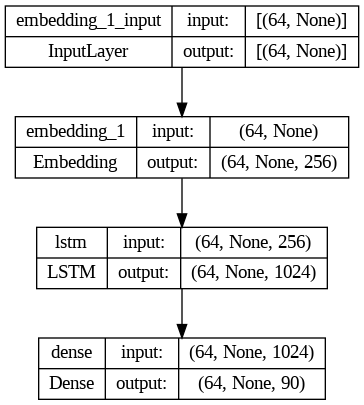

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

### **Try the model**

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 100, 90) # (batch_size, sequence_length, vocab_size)


In [ ]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-7.3652191e-04 -3.5488971e-03 -4.4865478e-03 -4.6455790e-03
  3.1022599e-03 -3.0145789e-03 -1.0951189e-06 -7.5155916e-04
 -1.5719747e-03  1.9486496e-03  4.0468236e-05  1.7365237e-03
  3.3438248e-03  2.5712554e-03 -3.7726047e-03 -6.6518392e-03
  3.6858816e-03  2.7927100e-03  4.3322649e-03 -4.7216949e-04
  1.8105548e-03  2.3067924e-03  2.5963585e-04 -3.7706192e-03
  6.5698423e-03 -5.4039026e-04  3.3338252e-03 -5.1451838e-03
  1.6324751e-03  2.6478706e-04  8.3798636e-04 -6.8308838e-04
 -7.9240417e-03  8.2396751e-04 -4.8700436e-03  2.8820497e-03
 -1.7362996e-05 -6.4328057e-04  4.1565439e-03 -3.0924403e-04
 -1.4522147e-03  4.2604678e-04  2.4698856e-03 -1.5900553e-03
  6.1207996e-03 -2.2564190e-03 -4.3880604e-03  3.8464773e-03
  2.5181798e-05 -5.3679324e-03  6.3197301e-03 -2.9753840e-03
 -3.4391130e-03 -2.6100432e-03  5.3197769e-03  9.4421301e-04
 -6.2449754e-04  1.7627531e-03  9.3036080e-03  3.9639202e-04
  1.9275385e-03 -

In [ ]:
# Quick overview of how tf.random.categorical() works.

# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0" is low but the
# probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];

# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)

print(tmp_samples)

tf.Tensor([[2 2 2 2 1]], shape=(1, 5), dtype=int64)


In [ ]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)

sampled_indices.shape

TensorShape([100, 1])

In [ ]:
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()

sampled_indices.shape

(100,)

In [ ]:
sampled_indices

array([30, 41, 80, 86, 84, 65, 79, 19,  9, 54, 45, 41, 25,  5, 58, 59, 60,
        8,  5, 43, 42, 65, 39, 17,  9, 89, 56,  9, 70, 86, 32, 18, 66, 71,
       65, 52, 43, 41,  3, 21, 48, 36, 85, 47, 26, 60, 10, 64, 81, 16, 64,
       26, 50, 62,  9, 68, 65, 79, 79,  4, 57, 35, 32, 79,  5, 89, 89, 31,
       85, 61, 40, 19, 47, 48,  0, 40, 37, 49, 61, 63,  8, 48, 61, 84, 38,
       56, 66, 35, 84, 77, 16, 36,  0, 77, 13,  6,  0, 72, 24,  9])

In [ ]:
print('Input:\n', repr(''.join(index2char[input_example_batch[0]])))
print()
print('Next char prediction:\n', repr(''.join(index2char[sampled_indices])))

Input:
 'at her feet, they seemed to be almost out of\nsight, they were getting so far off). “Oh, my poor litt'

Next char prediction:
 'CNx’—iw4)[RN:$bcd($POiL2)\ufeff_)n’E3joiYPN"6UI‘T;d*hy1h;Wf)liww#aHEw$\ufeff\ufeffD‘eM4TU\nMJVeg(Ue—K_jH—u1I\nu.%\np9)'


In [ ]:
for i, (input_idx, sample_idx) in enumerate(zip(input_example_batch[0][:5], sampled_indices[:5])):
    print('Prediction {:2d}'.format(i))
    print('  input: {} ({:s})'.format(input_idx, repr(index2char[input_idx])))
    print('  next predicted: {} ({:s})'.format(target_idx, repr(index2char[sample_idx])))

Prediction  0
  input: 57 ('a')
  next predicted: 43 ('C')
Prediction  1
  input: 76 ('t')
  next predicted: 43 ('N')
Prediction  2
  input: 1 (' ')
  next predicted: 43 ('x')
Prediction  3
  input: 64 ('h')
  next predicted: 43 ('’')
Prediction  4
  input: 61 ('e')
  next predicted: 43 ('—')


### **Train the model**

In [ ]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

example_batch_loss = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 90)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4999332


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [ ]:
# Directory where the checkpoints will be saved.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [ ]:
EPOCHS=40
history = model.fit(
  x=dataset,
  epochs=EPOCHS,
  callbacks=[
    checkpoint_callback
  ]
)

Epoch 1/40
25/25 [==============================] - 145s 6s/step - loss: 3.3726
Epoch 2/40
25/25 [==============================] - 164s 7s/step - loss: 3.0287
Epoch 3/40
25/25 [==============================] - 141s 6s/step - loss: 2.6495
Epoch 4/40
25/25 [==============================] - 140s 6s/step - loss: 2.4474
Epoch 5/40
25/25 [==============================] - 142s 6s/step - loss: 2.2886
Epoch 6/40
25/25 [==============================] - 141s 6s/step - loss: 2.1601
Epoch 7/40
25/25 [==============================] - 141s 6s/step - loss: 2.0413
Epoch 8/40
25/25 [==============================] - 140s 6s/step - loss: 1.9346
Epoch 9/40
25/25 [==============================] - 142s 6s/step - loss: 1.8401
Epoch 10/40
25/25 [==============================] - 141s 6s/step - loss: 1.7547
Epoch 11/40
25/25 [==============================] - 141s 6s/step - loss: 1.6804
Epoch 12/40
25/25 [==============================] - 141s 6s/step - loss: 1.6086
Epoch 13/40
25/25 [==================

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

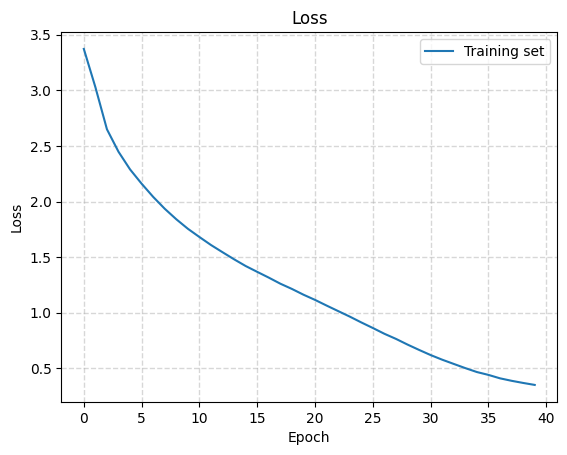

In [ ]:
render_training_history(history)

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'tmp/checkpoints/ckpt_40'

In [ ]:
simplified_batch_size = 1

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([simplified_batch_size, None]))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (1, None, 256)            23040     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_1 (Dense)             (1, None, 90)             92250     
                                                                 
Total params: 5,362,266
Trainable params: 5,362,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# num_generate
# - number of characters to generate.
#
# temperature
# - Low temperatures results in more predictable text.
# - Higher temperatures results in more surprising text.
# - Experiment to find the best setting.
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)

    # Converting our start string to numbers (vectorizing).
    input_indices = [char2index[s] for s in start_string]
    input_indices = tf.expand_dims(input_indices, 0)

    # Empty string to store our results.
    text_generated = []

    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
        predictions,
        num_samples=1
        )[-1,0].numpy()

        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)

        text_generated.append(index2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [ ]:
# Generate the text with default temperature (1.0).
generated_txt = generate_text(model, start_string=u"A sheep that thinks it's a traitor on itself over others ")
print(generated_txt)

A sheep that thinks it's a traitor on itself over others closed
in a wond up now me that the United States and you doowing to itself so,”

“I’ve sof the way—”

“Found _whUt_IS_ con’t be want to see what I’m much use, which was writtem
much
far her left under hea,” said Alice sadling with a very histerfful pecherse. “Yes, it’s pleased so marked, “I wonder what
they were now,” said the Caterpillar.

“Well, perhaps you’re was sure I’ll no pound!” said the Cat: “we’re all over high,” said Alice; “but it doesn’t many more then the Mock Turtle yet?”

“No one_ old wenth trems well
you all rade; so she tried hergeelves thought. Alice heard the Cat
said, “and if it mades a little!”

“Certainly Dormouse,” thought poor Alice, “to pretend the Project
Gutenberg-tm trademark. Contact then at the puppy it was in such a trice, and was begaming stilling all a nerpes in placed-taxing their heads of the Gryphon, the same size a bong turned away without knowing, and she
jumped up on to one of the
country 

In [ ]:
# Generate the text with higher temperature to get more unexpected results.
generated_txt_2 = generate_text(model, start_string=u"A sheep that thinks it's a traitor on itself over others ", temperature=1.0)
print(generated_txt_2)

A sheep that thinks it's a traitor on itself over others the
cerse-that had much curious creat-up of really musk be Mabel of life: in acclusted in the
fistribution of
the Fideon, on is it pusts, as yet word frow for the party. At ony
rate—” Seventhe Heg, nearly and loject alone.

“I didn’t see here.”

Alice said not looking apter it, she turned “Twime see, and the


Seeped his way, “consider, much usk its feet in the sky.

“I peape shar Dinah I don’t want it bur, I’m at any,” said Alice, turily just be great your
herr.”

“Well, perhaps yet you were getting seemed quite fallen deeping a little different. you see, sit continued as fell
what she sat dawe on the otherss.

“AG ANY Ken’t Lews Gutenberg"1 U11/016/1LU9TS LIPINDIng any addet with a Project Gutenberg-tm works in compliance with the terms of this
agreement before doforse, If a
mose—Alice’s she could tell her how speaking brown nting her way slippy at any rate it was latie
again, I very grad to
the
Queen, so the March Hare exbled 

In [ ]:
model_name = 'text_generation_wonderland_rnn.h5'
model.save(model_name, save_format='h5')

## **Text Summarization**

In [ ]:
import nltk
#nltk.download()
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import bs4 as BeautifulSoup
import urllib.request  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def _create_dictionary_table(text_string) -> dict:
   
    #removing stop words
    stop_words = set(stopwords.words("english"))
    
    words = word_tokenize(text_string)
    print(words)
    print("-----------------------------------")
    print("-----------------------------------")
    
    #reducing words to their root form
    stem = PorterStemmer()
    
    #creating dictionary for the word frequency table
    frequency_table = dict()
    for wd in words:
        wd = stem.stem(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:
            frequency_table[wd] += 1
        else:
            frequency_table[wd] = 1

    return frequency_table

In [ ]:
def _calculate_sentence_scores(sentences, frequency_table) -> dict:   

    print(frequency_table)
    #algorithm for scoring a sentence by its words
    sentence_weight = dict()

    for sentence in sentences:
        sentence_wordcount = (len(word_tokenize(sentence)))
        sentence_wordcount_without_stop_words = 0
        for word_weight in frequency_table:
            if word_weight in sentence.lower():
                sentence_wordcount_without_stop_words += 1
                if sentence[:7] in sentence_weight:
                    sentence_weight[sentence[:7]] += frequency_table[word_weight]
                else:
                    sentence_weight[sentence[:7]] = frequency_table[word_weight]

        sentence_weight[sentence[:7]] = sentence_weight[sentence[:7]] / sentence_wordcount_without_stop_words

       

    return sentence_weight

In [ ]:
def _calculate_average_score(sentence_weight) -> int:
   
    #calculating the average score for the sentences
    sum_values = 0
    for entry in sentence_weight:
        sum_values += sentence_weight[entry]

    #getting sentence average value from source text
    average_score = (sum_values / len(sentence_weight))

    return average_score

In [ ]:
def _get_article_summary(sentences, sentence_weight, threshold):
    sentence_counter = 0
    article_summary = ''

    for sentence in sentences:
        if sentence[:7] in sentence_weight and sentence_weight[sentence[:7]] >= (threshold):
            article_summary += " " + sentence
            sentence_counter += 1

    return article_summary

In [ ]:
def _run_article_summary(article):
    
    #creating a dictionary for the word frequency table
    frequency_table = _create_dictionary_table(article)

    #tokenizing the sentences
    sentences = sent_tokenize(article)

    #algorithm for scoring a sentence by its words
    sentence_scores = _calculate_sentence_scores(sentences, frequency_table)

    #getting the threshold
    threshold = _calculate_average_score(sentence_scores)

    #producing the summary
    article_summary = _get_article_summary(sentences, sentence_scores, 1.5 * threshold)

    return article_summary



In [ ]:
if __name__ == '__main__':
    summary_results = _run_article_summary(generated_txt)
    print("-----------------------------------")
    print("-----------------------------------")
    print("Generated Text: ")
    print(generated_txt)
    print("-----------------------------------")
    print("-----------------------------------")
    print("Summary: ")
    print(summary_results)

['A', 'sheep', 'that', 'thinks', 'it', "'s", 'a', 'traitor', 'on', 'itself', 'over', 'others', 'closed', 'in', 'a', 'wond', 'up', 'now', 'me', 'that', 'the', 'United', 'States', 'and', 'you', 'doowing', 'to', 'itself', 'so', ',', '”', '“', 'I', '’', 've', 'sof', 'the', 'way—', '”', '“', 'Found', '_whUt_IS_', 'con', '’', 't', 'be', 'want', 'to', 'see', 'what', 'I', '’', 'm', 'much', 'use', ',', 'which', 'was', 'writtem', 'much', 'far', 'her', 'left', 'under', 'hea', ',', '”', 'said', 'Alice', 'sadling', 'with', 'a', 'very', 'histerfful', 'pecherse', '.', '“', 'Yes', ',', 'it', '’', 's', 'pleased', 'so', 'marked', ',', '“', 'I', 'wonder', 'what', 'they', 'were', 'now', ',', '”', 'said', 'the', 'Caterpillar', '.', '“', 'Well', ',', 'perhaps', 'you', '’', 're', 'was', 'sure', 'I', '’', 'll', 'no', 'pound', '!', '”', 'said', 'the', 'Cat', ':', '“', 'we', '’', 're', 'all', 'over', 'high', ',', '”', 'said', 'Alice', ';', '“', 'but', 'it', 'doesn', '’', 't', 'many', 'more', 'then', 'the', 'Moc

In [7]:
#for a specific example: 
summary_results = "Yes, it’s pleased so marked, I wonder what they were now, said the Caterpillar."

## **Image to Text Generation**

In [1]:
!pip install diffusers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!nvidia-smi

Thu May 11 14:27:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached diffusers-0.3.0-py3-none-any.whl (153 kB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.16.1
    Uninstalling diffusers-0.16.1:
      Successfully uninstalled diffusers-0.16.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached diffusers-0.16.1-py3-none-any.whl (934 kB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.3.0
    Uninstalling diffusers-0.3.0:
      Successfully uninstalled diffusers-0.3.0


In [5]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

The cache for model files in Diffusers v0.14.0 has moved to a new location. Moving your existing cached models. This is a one-time operation, you can interrupt it or run it later by calling `diffusers.utils.hub_utils.move_cache()`.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [6]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

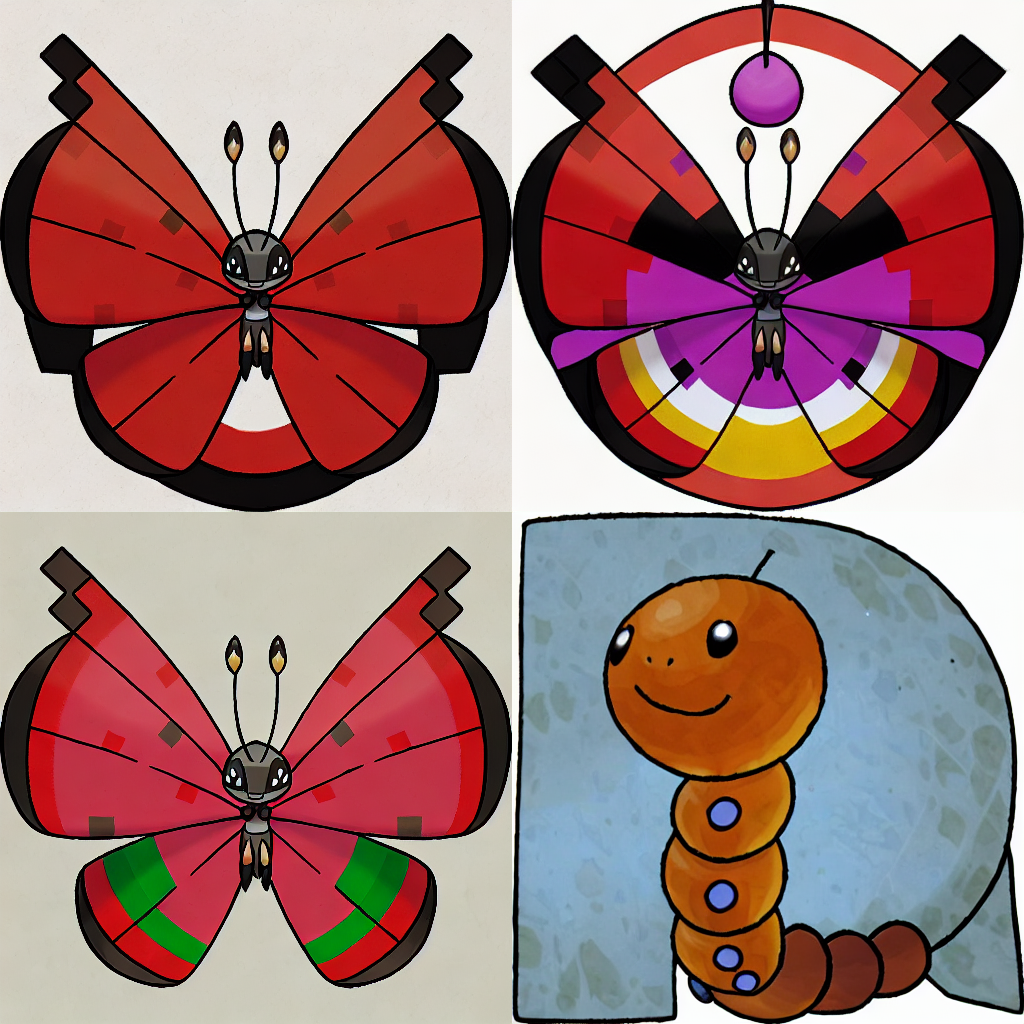

In [8]:
prompt = summary_results
scale = 8
n_samples = 4

# Sometimes the nsfw checker is confused by the Pokémon images, you can disable
# it at your own risk here
disable_safety = True

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], guidance_scale=scale).images

grid = image_grid(images, rows=2, cols=2)
grid
